In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import numpy as np
import glob

In [2]:
temp = []
data = []
subpxp = []
for year in range(2008,2018):    
    path ='D:/Groups/CalFootball_4thDown/NCAA-Football-Data/' + str(year) + 'PXP' # use your path
    allFiles = glob.glob(path + "/*.csv")
    frame = pd.DataFrame()
    list_ = []
    cols = ['gameId', 'driveIndex', 'year', 'week', 'clock', 'quarter', 'down', 'yardLine', 'distance', 'yardsGained',
            'offenseTeam', 'defenseTeam', 'description', 'type',
            'homeScore', 'awayScore', 'homeTeam', 'awayTeam']
    for file_ in allFiles:
        df = pd.read_csv(file_,index_col=None, header=0, usecols=cols)
        list_.append(df)
        subpxp = pd.concat(list_, ignore_index=True)
    temp.append(subpxp)
    data= pd.concat(temp, ignore_index=True)

In [3]:
import cal_football as cf
pxp = cf.extract_data(data)
badyard = ~((pxp['yrdline100']>=100)|(pxp['yrdline100']<=0))
ko_and_pos = cf.extract_kickoffs_and_possessions(pxp.loc[badyard])
possession_values = cf.get_possession_value(ko_and_pos)

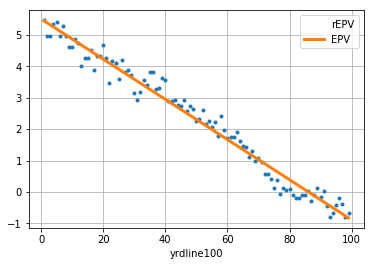

In [6]:
ax = possession_values.plot(y='rEPV', linestyle='', marker='.')
possession_values.plot(y='EPV', ax=ax, lw=3)
ax.grid()
